In [603]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from datetime import time

In [604]:
#load data
bikers_df = pd.read_csv('train.csv')

In [605]:
bikers_df.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,...,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_7277,Motorcycle,P3,Commercial,27,1,9:18:22 AM,27,1,9:18:42 AM,...,1,10:11:30 AM,6,20.9,1.0,-1.285772,36.808806,-1.296310,36.768822,23.47
1,UserLogger_1281,Motorcycle,P3,Commercial,25,1,12:07:04 PM,25,1,12:08:36 PM,...,1,1:02:09 PM,9,29.9,NaN,-1.229148,36.844029,-1.252492,36.865620,16.90
2,UserLogger_2566,Motorcycle,P3,Commercial,12,6,1:20:11 PM,12,6,1:34:44 PM,...,6,2:20:10 PM,9,28.5,NaN,-1.318062,36.849326,-1.265715,36.823815,21.83
3,UserLogger_11805,Motorcycle,P3,Commercial,28,4,11:13:53 AM,28,4,11:14:07 AM,...,4,11:53:23 AM,9,26.8,NaN,-1.263818,36.793006,-1.300406,36.829741,0.05
4,UserLogger_15199,Motorcycle,P3,Commercial,12,2,1:41:02 PM,12,2,1:41:57 PM,...,2,3:12:49 PM,7,30.1,NaN,-1.263813,36.784977,-1.294875,36.793891,27.57


In [606]:
#shape of the data
bikers_df.shape

(14840, 27)

In [607]:
bikers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14840 entries, 0 to 14839
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   User_ID                                      14840 non-null  object 
 1   Tranport_Vehicle                             14840 non-null  object 
 2   Platform                                     14840 non-null  object 
 3   Purpose                                      14840 non-null  object 
 4   Order_Day_of_Month                           14840 non-null  int64  
 5   Order_Week_of_Month                          14840 non-null  int64  
 6   Time_of_Order                                14840 non-null  object 
 7   Order_Confirm_Day_of_Month                   14840 non-null  int64  
 8   Order_Confirm_Day_of_Weekday                 14840 non-null  int64  
 9   Time_of_Confirmation                         14840 non-null  object 
 10

In [608]:
#bikers_df.iloc[:, [6,9,12,15,18]] = bikers_df.iloc[:, [6,9,12,15,18]].apply(pd.to_datetime)

In [609]:
#check for null values
np.sum(bikers_df.isnull())

User_ID                                            0
Tranport_Vehicle                                   0
Platform                                           0
Purpose                                            0
Order_Day_of_Month                                 0
Order_Week_of_Month                                0
Time_of_Order                                      0
Order_Confirm_Day_of_Month                         0
Order_Confirm_Day_of_Weekday                       0
Time_of_Confirmation                               0
Arrival_At_Pickup_MonthDay                         0
Arrival_At_Pickup_Weekday                          0
Arrival_at_Pickup_Time                             0
Pickup_MonthDay                                    0
Pickup_WeekDay                                     0
Pickup_Time                                        0
Delivery_MonthDay                                  0
Delivery_Weekday                                   0
Delivery_Time                                 

In [610]:
#drop Precipitation_in_millimeters . It has so much null values

bikers_df.drop(['Precipitation_in_millimeters', 'User_ID'], axis=1, inplace = True)

In [611]:
#create new column to indicate AM OR PM

bikers_df['Period_Of_The_Day'] = bikers_df['Delivery_Time'].str[-2:]

In [612]:
#CHANGE PLATFORM TO ONLY INDICATE 1,2,3 INSTEAD OF P1, P2, P3

bikers_df['Platform'] = bikers_df['Platform'].str[-1:]

In [613]:
#GET THE MEAN OF THE TEMPERATURES AS RESPECTS TO THE WEEKDAY

grouped_temp = bikers_df.groupby('Delivery_Weekday').agg({'Temperation': ['mean', 'min', 'max']})

print(grouped_temp)

                 Temperation            
                        mean   min   max
Delivery_Weekday                        
1                  26.010859  17.1  34.0
2                  26.020669  14.2  34.2
3                  26.430937  16.5  33.8
4                  26.394428  16.2  34.3
5                  26.500781  16.3  35.1
6                  25.707751  17.1  34.2
7                  25.885965  17.6  33.3


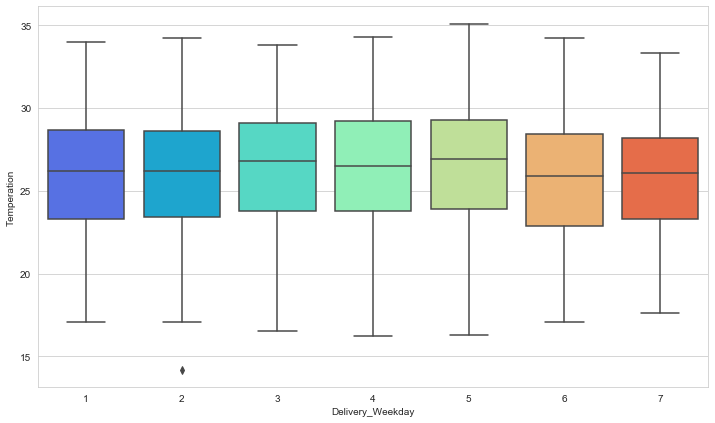

In [614]:
# boxplot of the Delivery_Weekday relative to Temperature to determine the mean age per Pclass

plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Delivery_Weekday', y='Temperation', data=bikers_df, palette='rainbow')

In [615]:
def input_temp(cols):
    """
    Inputs the mean of the temperature relative to the Delivery_Weekday
    
    """
    Temperation = cols[0]
    Delivery_Weekday = cols[1]
    
    if pd.isnull(Temperation):
        
        if Delivery_Weekday ==1:
            return 26.01
        elif Delivery_Weekday ==2:
            return 26.02
        elif Delivery_Weekday ==3:
            return 26.43
        elif Delivery_Weekday ==4:
            return 26.39
        elif Delivery_Weekday ==5:
            return 26.50
        elif Delivery_Weekday ==6:
            return 25.71
        else:
            return 25.89;
    else:
        return Temperation

In [616]:
bikers_df['Temperation'] = bikers_df[['Temperation','Delivery_Weekday']].apply(input_temp,axis=1)

In [617]:
bikers_df.head()

,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,...,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Period_Of_The_Day
0,Motorcycle,3,Commercial,27,1,9:18:22 AM,27,1,9:18:42 AM,27,...,1,10:11:30 AM,6,20.9,-1.285772,36.808806,-1.296310,36.768822,23.47,AM
1,Motorcycle,3,Commercial,25,1,12:07:04 PM,25,1,12:08:36 PM,25,...,1,1:02:09 PM,9,29.9,-1.229148,36.844029,-1.252492,36.865620,16.90,PM
2,Motorcycle,3,Commercial,12,6,1:20:11 PM,12,6,1:34:44 PM,12,...,6,2:20:10 PM,9,28.5,-1.318062,36.849326,-1.265715,36.823815,21.83,PM
3,Motorcycle,3,Commercial,28,4,11:13:53 AM,28,4,11:14:07 AM,28,...,4,11:53:23 AM,9,26.8,-1.263818,36.793006,-1.300406,36.829741,0.05,AM
4,Motorcycle,3,Commercial,12,2,1:41:02 PM,12,2,1:41:57 PM,12,...,2,3:12:49 PM,7,30.1,-1.263813,36.784977,-1.294875,36.793891,27.57,PM


In [618]:
#recheck for any null values
np.sum(bikers_df.isnull())

Tranport_Vehicle                               0
Platform                                       0
Purpose                                        0
Order_Day_of_Month                             0
Order_Week_of_Month                            0
Time_of_Order                                  0
Order_Confirm_Day_of_Month                     0
Order_Confirm_Day_of_Weekday                   0
Time_of_Confirmation                           0
Arrival_At_Pickup_MonthDay                     0
Arrival_At_Pickup_Weekday                      0
Arrival_at_Pickup_Time                         0
Pickup_MonthDay                                0
Pickup_WeekDay                                 0
Pickup_Time                                    0
Delivery_MonthDay                              0
Delivery_Weekday                               0
Delivery_Time                                  0
DistanceCovered_KM                             0
Temperation                                    0
Latitude_Pickup     

In [619]:
bikers_df.shape

(14840, 26)

In [620]:
#get numerical data

numerical_df = bikers_df.select_dtypes(include=('float64','int64'))
numerical_df.head()

,Order_Day_of_Month,Order_Week_of_Month,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,Pickup_MonthDay,Pickup_WeekDay,Delivery_MonthDay,Delivery_Weekday,DistanceCovered_KM,Temperation,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,27,1,27,1,27,1,27,1,27,1,6,20.9,-1.285772,36.808806,-1.296310,36.768822,23.47
1,25,1,25,1,25,1,25,1,25,1,9,29.9,-1.229148,36.844029,-1.252492,36.865620,16.90
2,12,6,12,6,12,6,12,6,12,6,9,28.5,-1.318062,36.849326,-1.265715,36.823815,21.83
3,28,4,28,4,28,4,28,4,28,4,9,26.8,-1.263818,36.793006,-1.300406,36.829741,0.05
4,12,2,12,2,12,2,12,2,12,2,7,30.1,-1.263813,36.784977,-1.294875,36.793891,27.57


In [621]:
#ger categorical data
categorical_df = bikers_df.select_dtypes(exclude=('float64','int64'))
categorical_df.head()

,Tranport_Vehicle,Platform,Purpose,Time_of_Order,Time_of_Confirmation,Arrival_at_Pickup_Time,Pickup_Time,Delivery_Time,Period_Of_The_Day
0,Motorcycle,3,Commercial,9:18:22 AM,9:18:42 AM,9:46:23 AM,9:48:02 AM,10:11:30 AM,AM
1,Motorcycle,3,Commercial,12:07:04 PM,12:08:36 PM,12:41:16 PM,12:45:15 PM,1:02:09 PM,PM
2,Motorcycle,3,Commercial,1:20:11 PM,1:34:44 PM,1:54:51 PM,1:58:20 PM,2:20:10 PM,PM
3,Motorcycle,3,Commercial,11:13:53 AM,11:14:07 AM,11:25:32 AM,11:53:20 AM,11:53:23 AM,AM
4,Motorcycle,3,Commercial,1:41:02 PM,1:41:57 PM,2:40:49 PM,2:45:15 PM,3:12:49 PM,PM


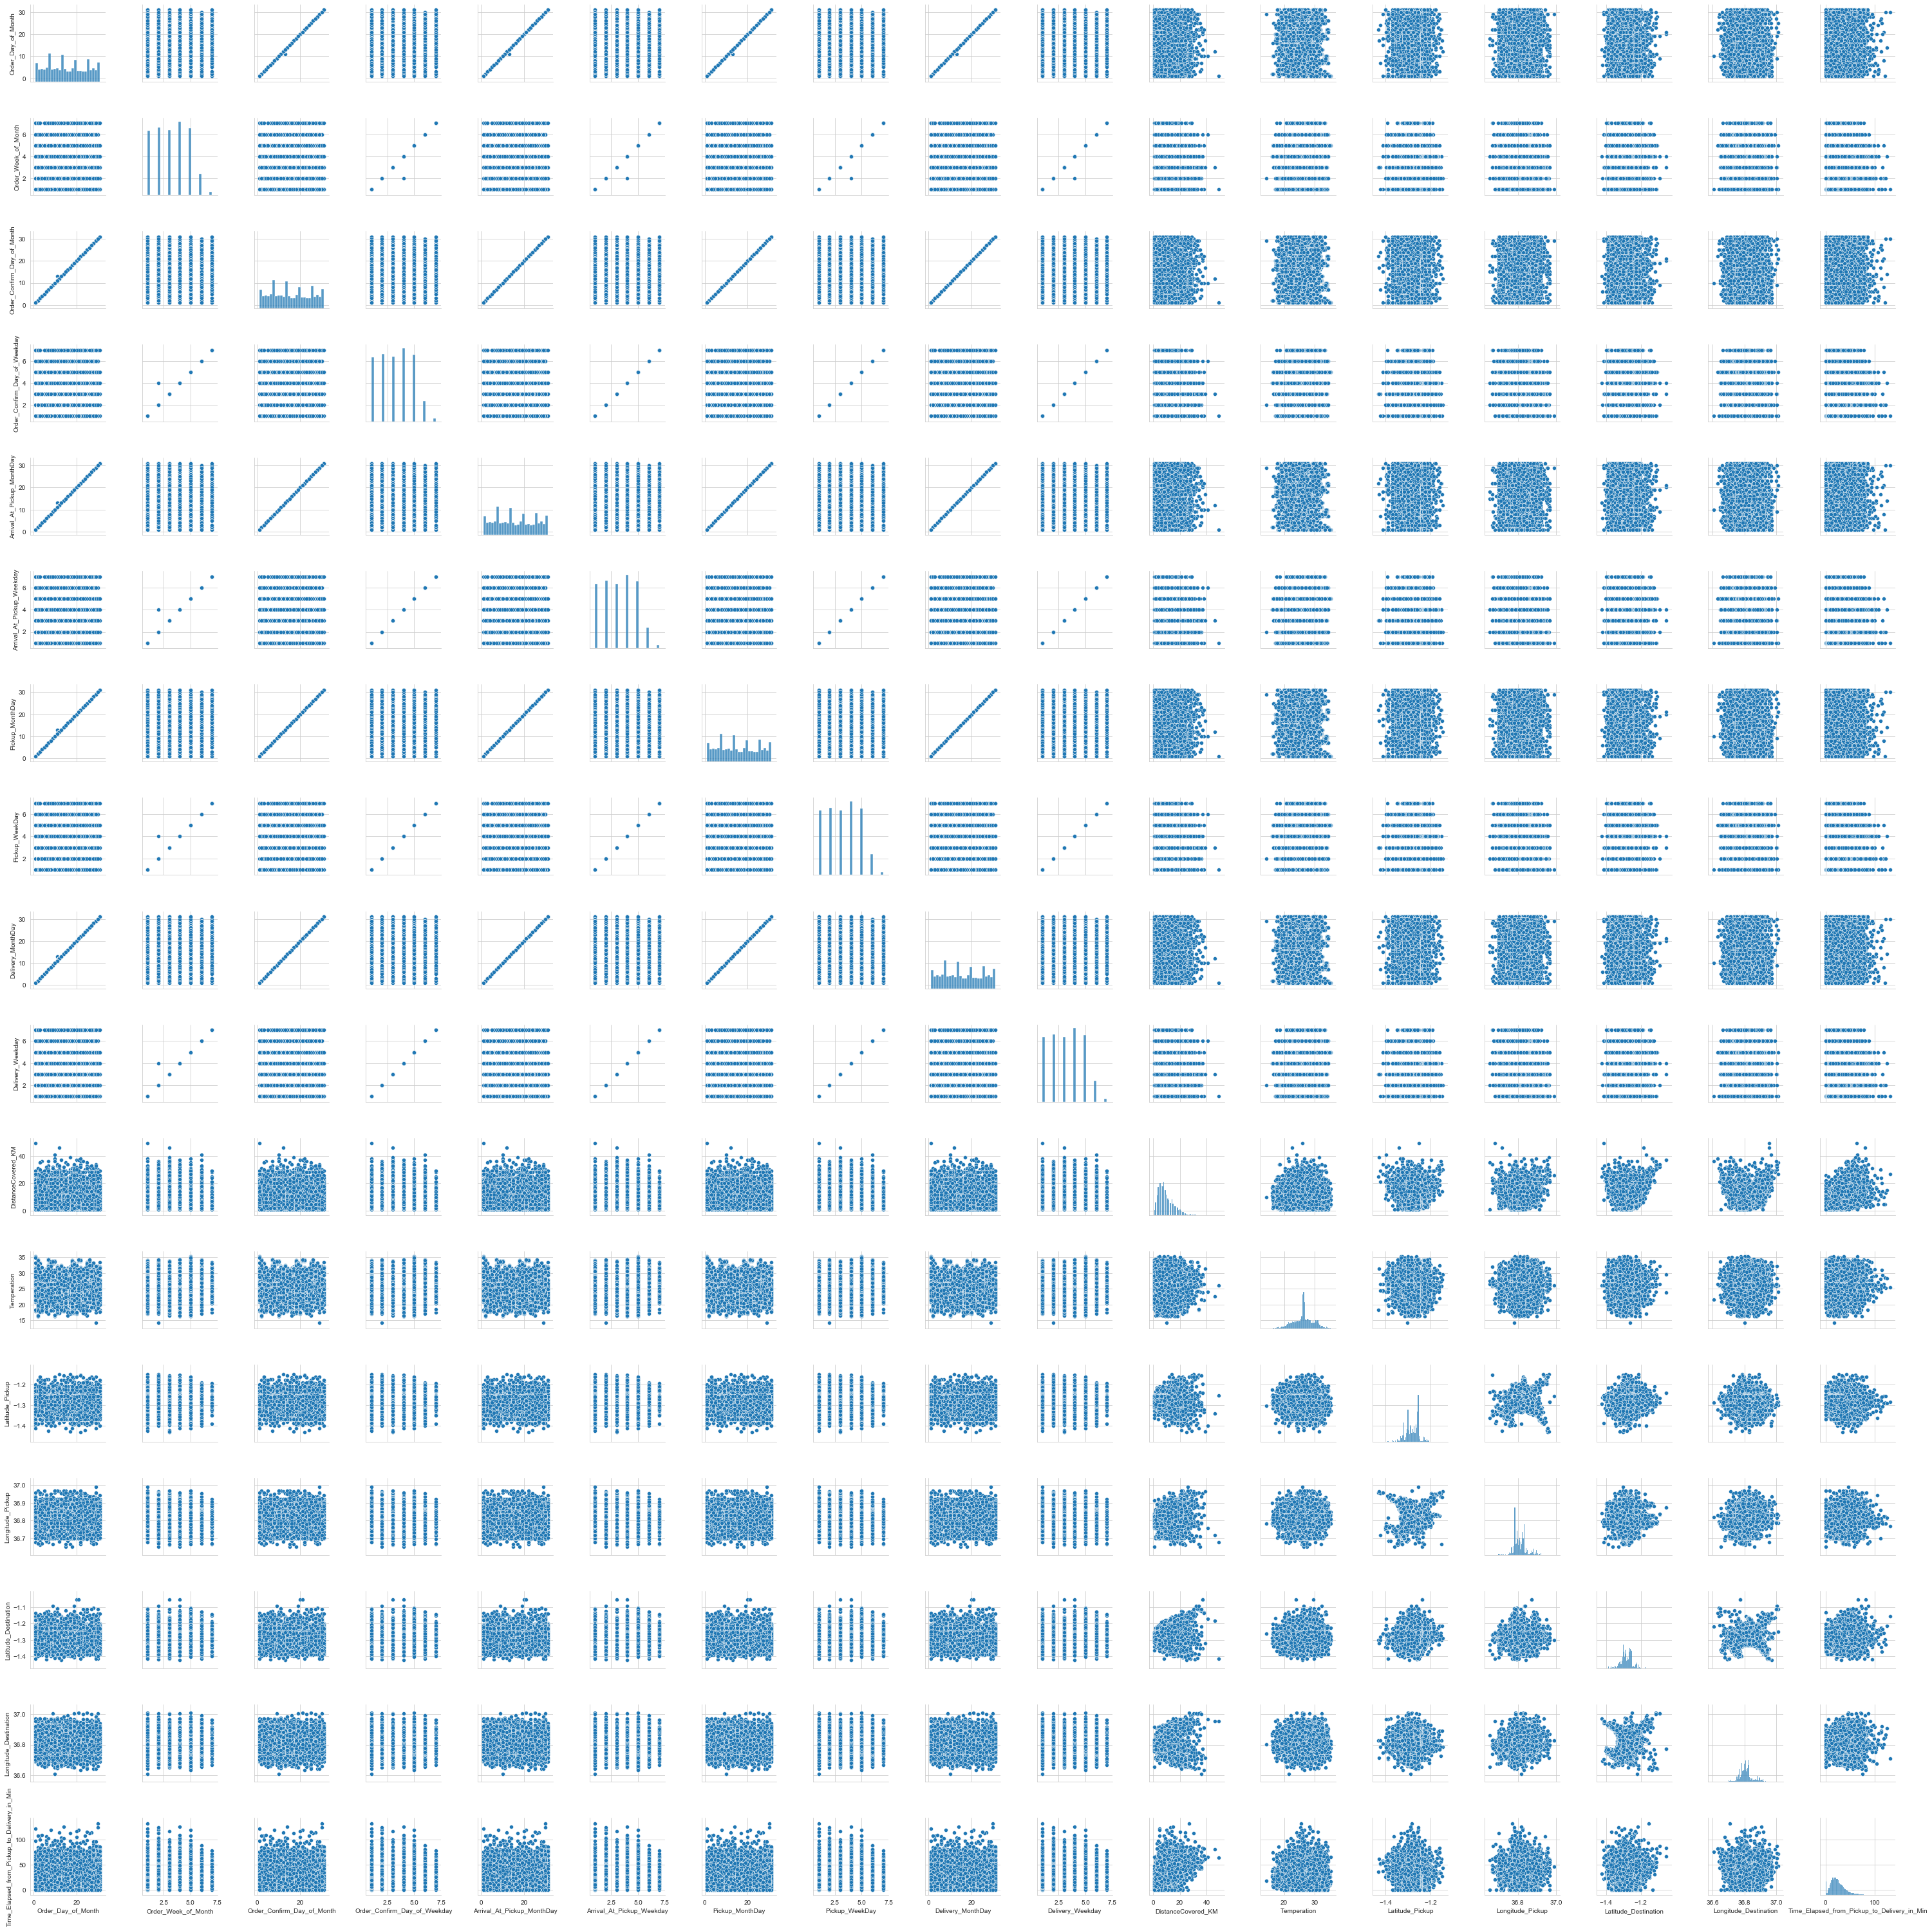

In [534]:
#pairplot for all columns

sns.pairplot(bikers_df)

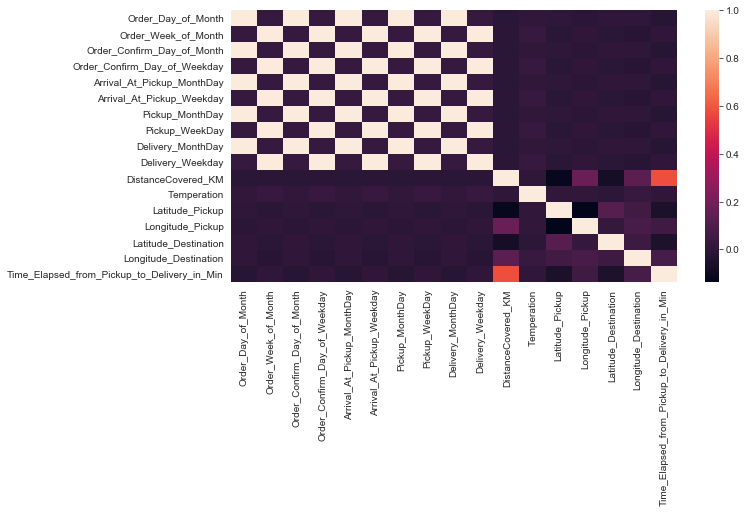

In [622]:
#heatmap to show correlation between columns

plt.figure(figsize = (10,5))
sns.heatmap(numerical_df.corr())

C:\Users\HP SPECTRE 13 X360\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


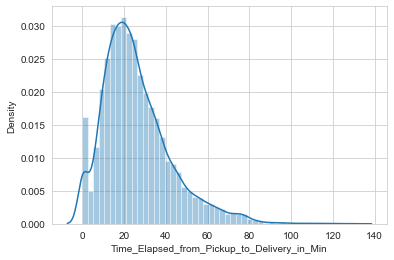

In [623]:
#show the ditrution of the Time_Elapsed_from_Pickup_to_Delivery_in_Min

sns.distplot(bikers_df['Time_Elapsed_from_Pickup_to_Delivery_in_Min'])

> # from the above, we can see it is rightly skewed

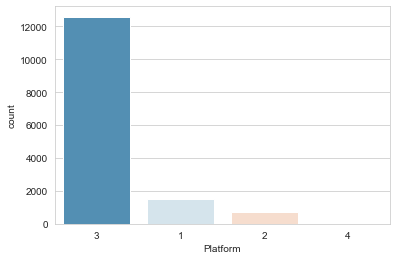

In [624]:
# frequency of platform

sns.set_style("whitegrid") 
sns.countplot(x="Platform", data=bikers_df, palette='RdBu_r')

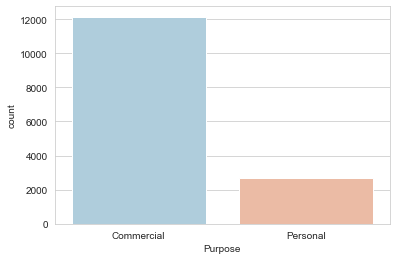

In [625]:
# frequency of Purpose

sns.set_style("whitegrid") 
sns.countplot(x="Purpose", data=bikers_df, palette='RdBu_r')

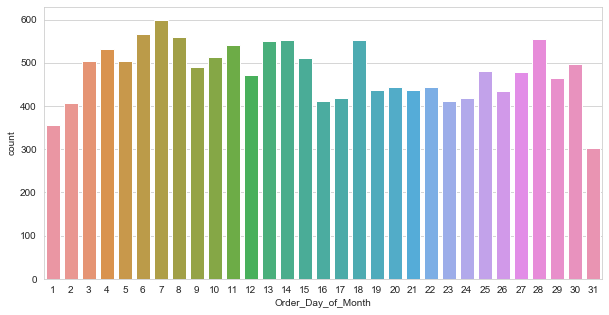

In [626]:
# frequency of day of the month

plt.figure(figsize = (10,5))
sns.set_style("whitegrid") 
sns.countplot(x="Order_Day_of_Month", data=bikers_df)

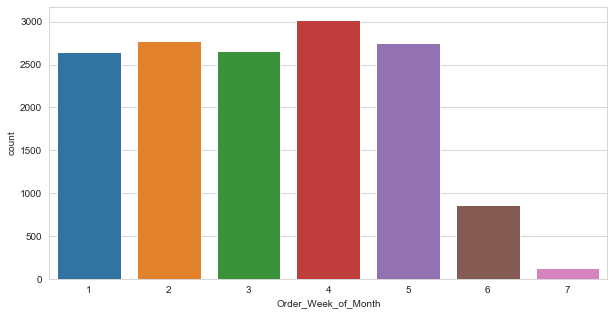

In [627]:
# frequency of week of the month

plt.figure(figsize = (10,5))
sns.set_style("whitegrid") 
sns.countplot(x="Order_Week_of_Month", data=bikers_df)

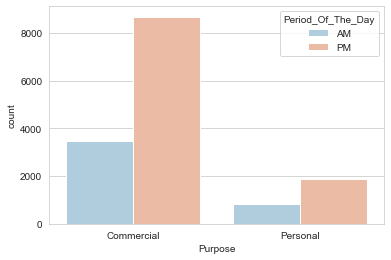

In [628]:
sns.set_style("whitegrid") 
sns.countplot(x="Purpose", hue='Period_Of_The_Day', data=bikers_df, palette='RdBu_r')

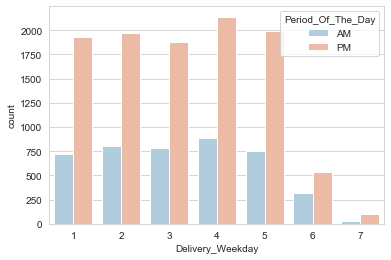

In [629]:
sns.set_style("whitegrid") 
sns.countplot(x="Delivery_Weekday", hue='Period_Of_The_Day', data=bikers_df, palette='RdBu_r')

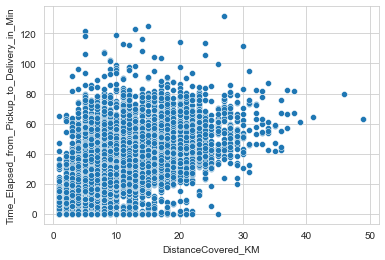

In [630]:
#show correlation between the DistanceCovered_KM and Time_Elapsed_from_Pickup_to_Delivery_in_Min
sns.scatterplot(data=bikers_df, x="DistanceCovered_KM", y="Time_Elapsed_from_Pickup_to_Delivery_in_Min")

In [631]:
bikers_df.head()

,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,...,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Period_Of_The_Day
0,Motorcycle,3,Commercial,27,1,9:18:22 AM,27,1,9:18:42 AM,27,...,1,10:11:30 AM,6,20.9,-1.285772,36.808806,-1.296310,36.768822,23.47,AM
1,Motorcycle,3,Commercial,25,1,12:07:04 PM,25,1,12:08:36 PM,25,...,1,1:02:09 PM,9,29.9,-1.229148,36.844029,-1.252492,36.865620,16.90,PM
2,Motorcycle,3,Commercial,12,6,1:20:11 PM,12,6,1:34:44 PM,12,...,6,2:20:10 PM,9,28.5,-1.318062,36.849326,-1.265715,36.823815,21.83,PM
3,Motorcycle,3,Commercial,28,4,11:13:53 AM,28,4,11:14:07 AM,28,...,4,11:53:23 AM,9,26.8,-1.263818,36.793006,-1.300406,36.829741,0.05,AM
4,Motorcycle,3,Commercial,12,2,1:41:02 PM,12,2,1:41:57 PM,12,...,2,3:12:49 PM,7,30.1,-1.263813,36.784977,-1.294875,36.793891,27.57,PM


In [632]:
#get dummy variables for Purpose and Period of the day

Purpose = pd.get_dummies(bikers_df['Purpose'], drop_first = True)
Period_of_the_day = pd.get_dummies(bikers_df['Period_Of_The_Day'], drop_first = True)
Purpose.head()

,Personal
0,0
1,0
2,0
3,0
4,0


In [633]:
Period_of_the_day.head()

,PM
0,0
1,1
2,1
3,0
4,1


In [634]:
bikers_df.drop(['Purpose', 'Period_Of_The_Day'], axis=1, inplace=True)

In [635]:
#concat dataframe to new dummy variables

bikers_df = pd.concat([bikers_df, Purpose, Period_of_the_day], axis = 1)

In [636]:
# Function to convert the date format
def convert24(str1):
      
    # Checking if last two elements of time
    # is AM and first two elements are 12
    if str1[-2:] == "AM" and str1[:2] == "12":
        return "00" + str1[2:-2]
          
    # remove the AM    
    elif str1[-2:] == "AM":
        return str1[:-2]
      
    # Checking if last two elements of time
    # is PM and first two elements are 12   
    elif str1[-2:] == "PM" and str1[:2] == "12":
        return str1[:-2]
          
    else:
          
        # add 12 to hours and remove PM
        return str(int(str1[0]) + 12) +':'+ str1[2:8]

In [637]:
# Function to convert the HOUR format
def hour(str1):
      
    # Checking if last two elements of time
    # is AM and first two elements are 12
    if str1[-2:] == "AM" and str1[:2] == "12":
        return "00"
          
    # remove the AM    
    elif str1[-2:] == "AM" and str1[1] == ":":
        return str1[0]
    
    # remove the AM    
    elif str1[-2:] == "AM" and str1[2] == ":":
        return str1[:2]
      
    # Checking if last two elements of time
    # is PM and first two elements are 12   
    elif str1[-2:] == "PM" and str1[:2] == "12":
        return '12'
    
    # Checking if last two elements of time
    # is PM and first two elements are 12   
    elif str1[-2:] == "PM" and str1[1] == ":":
        return str(int(str1[:1]) + 12)
          
    else:
          
        # add 12 to hours and remove PM
        return str(int(str1[:2]) + 12)

In [638]:
# Function to convert the MINUTE format
def minute(str1):
      
    # Checking if last two elements of time
    # is AM and first two elements are 12
    if str1[1] == ":":
        return str1[2:4]
          
    else:
        return str1[3:5]

In [639]:
bikers_df['Delivery_Minute']= bikers_df['Delivery_Time'].apply(minute,bikers_df['Delivery_Time'].index.all())

In [640]:
bikers_df['Delivery_Hour']= bikers_df['Delivery_Time'].apply(hour,bikers_df['Delivery_Time'].index.all())

In [641]:
bikers_df['Pickup_Hour']= bikers_df['Pickup_Time'].apply(hour,bikers_df['Pickup_Time'].index.all())

In [642]:
bikers_df['Pickup_Minute']= bikers_df['Pickup_Time'].apply(minute,bikers_df['Pickup_Time'].index.all())

In [643]:
bikers_df['Pickup_Time']= bikers_df['Pickup_Time'].apply(convert24,bikers_df['Pickup_Time'].index.all())

In [644]:
bikers_df['Delivery_Time']= bikers_df['Delivery_Time'].apply(convert24,bikers_df['Delivery_Time'].index.all())

In [645]:
bikers_df.head()

,Tranport_Vehicle,Platform,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,Arrival_At_Pickup_MonthDay,Arrival_At_Pickup_Weekday,...,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Time_Elapsed_from_Pickup_to_Delivery_in_Min,Personal,PM,Delivery_Minute,Delivery_Hour,Pickup_Hour,Pickup_Minute
0,Motorcycle,3,27,1,9:18:22 AM,27,1,9:18:42 AM,27,1,...,36.808806,-1.296310,36.768822,23.47,0,0,11,10,9,48
1,Motorcycle,3,25,1,12:07:04 PM,25,1,12:08:36 PM,25,1,...,36.844029,-1.252492,36.865620,16.90,0,1,02,13,12,45
2,Motorcycle,3,12,6,1:20:11 PM,12,6,1:34:44 PM,12,6,...,36.849326,-1.265715,36.823815,21.83,0,1,20,14,13,58
3,Motorcycle,3,28,4,11:13:53 AM,28,4,11:14:07 AM,28,4,...,36.793006,-1.300406,36.829741,0.05,0,0,53,11,11,53
4,Motorcycle,3,12,2,1:41:02 PM,12,2,1:41:57 PM,12,2,...,36.784977,-1.294875,36.793891,27.57,0,1,12,15,14,45


In [646]:
#we are also dropping a few columns as they do not have any effect on the prediction 
bikers_df.drop(['Tranport_Vehicle', 'Order_Day_of_Month', 'Order_Week_of_Month', 'Time_of_Order', 'Order_Confirm_Day_of_Month', 'Order_Confirm_Day_of_Weekday', 'Time_of_Confirmation', 'Arrival_At_Pickup_MonthDay', 'Arrival_At_Pickup_Weekday', 'Arrival_at_Pickup_Time'], axis=1, inplace=True)

In [647]:
#check for columns left

bikers_df.columns

Index(['Platform', 'Pickup_MonthDay', 'Pickup_WeekDay', 'Pickup_Time',
       'Delivery_MonthDay', 'Delivery_Weekday', 'Delivery_Time',
       'DistanceCovered_KM', 'Temperation', 'Latitude_Pickup',
       'Longitude_Pickup', 'Latitude_Destination', 'Longitude_Destination',
       'Time_Elapsed_from_Pickup_to_Delivery_in_Min', 'Personal', 'PM',
       'Delivery_Minute', 'Delivery_Hour', 'Pickup_Hour', 'Pickup_Minute'],
      dtype='object')

In [648]:
bikers_df.shape

(14840, 20)

In [ ]:
#change datatype to datetime
bikers_df['Pickup_Time']= pd.to_datetime(bikers_df['Pickup_Time'])
bikers_df['Delivery_Time']= pd.to_datetime(bikers_df['Delivery_Time'])

In [653]:
bikers_df['Pickup_Hour'] = bikers_df['Pickup_Hour'].astype(int)
bikers_df['Pickup_Minute'] = bikers_df['Pickup_Minute'].astype(int)
bikers_df['Delivery_Hour'] = bikers_df['Delivery_Hour'].astype(int)
bikers_df['Delivery_Minute'] = bikers_df['Delivery_Minute'].astype(int)

In [654]:
bikers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14840 entries, 0 to 14839
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Platform                                     14840 non-null  object 
 1   Pickup_MonthDay                              14840 non-null  int64  
 2   Pickup_WeekDay                               14840 non-null  int64  
 3   Pickup_Time                                  14840 non-null  object 
 4   Delivery_MonthDay                            14840 non-null  int64  
 5   Delivery_Weekday                             14840 non-null  int64  
 6   Delivery_Time                                14840 non-null  object 
 7   DistanceCovered_KM                           14840 non-null  int64  
 8   Temperation                                  14840 non-null  float64
 9   Latitude_Pickup                              14840 non-null  float64
 10

In [126]:
##import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [655]:
X = bikers_df.drop(['Pickup_Time', 'Delivery_Time','Time_Elapsed_from_Pickup_to_Delivery_in_Min'], axis = 'columns')

In [656]:
y = bikers_df['Time_Elapsed_from_Pickup_to_Delivery_in_Min']

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [658]:
#feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

## CREATING AND TRAINING THE MODEL

#### MODEL 1  --  LINEAR REGRESSION

In [659]:
#assign LnearRegression class to a variable lm
lm = LinearRegression()

In [660]:
#train the model
lm.fit(X_train,y_train)

LinearRegression()

In [661]:
X_train.shape

(10388, 17)

In [662]:
y_train.shape

(10388,)

## Evaulate the model

print out the intercept.

The intercept (often labeled the constant) is the expected mean value of Y when all X=0

In [663]:
print(lm.intercept_)

26.091066615325314


In [664]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Platform,-3.363046e-05
Pickup_MonthDay,-1.297531e+12
Pickup_WeekDay,-1.014166e+13
Delivery_MonthDay,1.297531e+12
Delivery_Weekday,1.014166e+13
DistanceCovered_KM,1.085660e-02
Temperation,8.873562e-04
Latitude_Pickup,4.626104e-04
Longitude_Pickup,1.553457e-03
Latitude_Destination,-6.172681e-04


### PREDICTIONS FROM OUR MODEL

In [665]:
predictions = lm.predict(X_test)

In [666]:
predictions

array([ 0.42372384, 38.53460294, 31.58111697, ..., 20.25318302,
        1.35441318, 33.70468341])

In [667]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [668]:
print('Train Score: ', lm.score(X_train, y_train))  
print('Test Score: ', lm.score(X_test, y_test)) 

Train Score:  0.9994004734541924
Test Score:  0.9976391283510767


In [669]:
lm.score(X_train,y_train)

0.9994004734541924

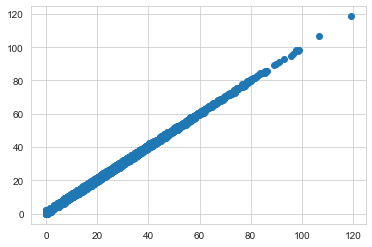

In [670]:
#check the correlation between the original and predicted price
plt.scatter(y_test, predictions)

In [671]:
#import metrics from scikt learn
from sklearn import metrics

In [672]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE: 0.6260844882628146
MSE: 0.5996385132407381
RMSE: 0.7912550083650748


#### MODEL 2 - CATBOOST

In [673]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [674]:
from catboost import CatBoostRegressor

In [675]:
model = CatBoostRegressor(learning_rate=1,
                          depth=2)

In [676]:
# Fit model
model.fit(X_train, y_train)

0:	learn: 14.3217994	total: 161ms	remaining: 2m 41s
1:	learn: 13.8093190	total: 172ms	remaining: 1m 26s
2:	learn: 13.7245078	total: 182ms	remaining: 1m
3:	learn: 13.6511549	total: 189ms	remaining: 47s
4:	learn: 13.5456840	total: 194ms	remaining: 38.6s
5:	learn: 13.3108448	total: 198ms	remaining: 32.8s
6:	learn: 13.2669273	total: 202ms	remaining: 28.6s
7:	learn: 13.0454427	total: 206ms	remaining: 25.5s
8:	learn: 12.9509672	total: 209ms	remaining: 23s
9:	learn: 12.8644648	total: 212ms	remaining: 20.9s
10:	learn: 12.6811131	total: 214ms	remaining: 19.3s
11:	learn: 12.4949716	total: 217ms	remaining: 17.9s
12:	learn: 12.3916401	total: 219ms	remaining: 16.7s
13:	learn: 12.2871855	total: 222ms	remaining: 15.6s
14:	learn: 12.1805324	total: 224ms	remaining: 14.7s
15:	learn: 12.1076050	total: 226ms	remaining: 13.9s
16:	learn: 11.9135206	total: 229ms	remaining: 13.2s
17:	learn: 11.6807628	total: 231ms	remaining: 12.6s
18:	learn: 11.5232415	total: 234ms	remaining: 12.1s
19:	learn: 11.3790752	total

In [748]:
# Get predictions
preds = model.predict(X_test)

In [749]:
preds

array([-0.16400286, 35.78611273, 32.00483413, ..., 19.32666538,
        1.85935769, 36.63171576])

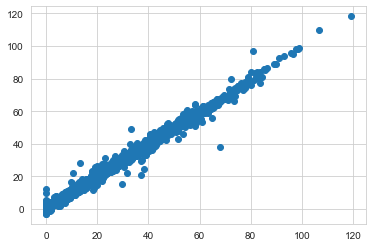

In [750]:
#check the correlation between the original and predicted time
plt.scatter(y_test, preds)

In [679]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, preds)))

MAE: 1.0368729568271913
MSE: 2.48062675906106
RMSE: 1.018269589464004


In [718]:
#TEST SECOND DATASET
test_df = pd.read_csv('test.csv')

In [719]:
test_df.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,...,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,...,4,1,4:01:26 PM,13,NaN,NaN,-1.255189,36.782203,-1.320822,36.829574
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,...,13,5,4:21:44 PM,13,22.1,NaN,-1.240620,36.773649,-1.294744,36.762489
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,...,11,1,10:55:02 AM,11,29.6,NaN,-1.316711,36.830156,-1.263818,36.793006
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,...,5,2,6:12:00 PM,21,28.2,NaN,-1.286018,36.897534,-1.301201,36.764868
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,...,11,5,4:27:57 PM,11,25.4,NaN,-1.331619,36.847976,-1.293515,36.897607


In [720]:
test_df.shape

(6361, 26)

In [721]:
np.sum(test_df.isnull())

User_ID                            0
Tranport_Vehicle                   0
Platform                           0
Purpose                            0
Order_Day_of_Month                 0
Order_Week_of_Month                0
Time_of_Order                      0
Order_Confirm_Day_of_Month         0
Order_Confirm_Day_of_Weekday       0
Time_of_Confirmation               0
Arrival_At_Pickup_MonthDay         0
Arrival_At_Pickup_Weekday          0
Arrival_at_Pickup_Time             0
Pickup_MonthDay                    0
Pickup_WeekDay                     0
Pickup_Time                        0
Delivery_MonthDay                  0
Delivery_Weekday                   0
Delivery_Time                      0
DistanceCovered_KM                 0
Temperation                     1294
Precipitation_in_millimeters    6201
Latitude_Pickup                    0
Longitude_Pickup                   0
Latitude_Destination               0
Longitude_Destination              0
dtype: int64

In [722]:
test_df['Temperation'] = test_df[['Temperation','Delivery_Weekday']].apply(input_temp,axis=1)

In [723]:
test_df.head()

,User_ID,Tranport_Vehicle,Platform,Purpose,Order_Day_of_Month,Order_Week_of_Month,Time_of_Order,Order_Confirm_Day_of_Month,Order_Confirm_Day_of_Weekday,Time_of_Confirmation,...,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,Temperation,Precipitation_in_millimeters,Latitude_Pickup,Longitude_Pickup,Latitude_Destination,Longitude_Destination
0,UserLogger_6224,Motorcycle,P3,Commercial,4,1,3:08:18 PM,4,1,3:10:19 PM,...,4,1,4:01:26 PM,13,26.01,NaN,-1.255189,36.782203,-1.320822,36.829574
1,UserLogger_16205,Motorcycle,P1,Personal,13,5,3:34:11 PM,13,5,3:35:44 PM,...,13,5,4:21:44 PM,13,22.10,NaN,-1.240620,36.773649,-1.294744,36.762489
2,UserLogger_17099,Motorcycle,P3,Commercial,11,1,10:18:09 AM,11,1,10:18:18 AM,...,11,1,10:55:02 AM,11,29.60,NaN,-1.316711,36.830156,-1.263818,36.793006
3,UserLogger_9892,Motorcycle,P3,Commercial,5,2,4:45:37 PM,5,2,4:48:44 PM,...,5,2,6:12:00 PM,21,28.20,NaN,-1.286018,36.897534,-1.301201,36.764868
4,UserLogger_8487,Motorcycle,P3,Commercial,11,5,3:56:56 PM,11,5,3:57:09 PM,...,11,5,4:27:57 PM,11,25.40,NaN,-1.331619,36.847976,-1.293515,36.897607


In [724]:
#create new column to indicate AM OR PM

test_df['Period_Of_The_Day'] = test_df['Delivery_Time'].str[-2:]

In [725]:
#CHANGE PLATFORM TO ONLY INDICATE 1,2,3 INSTEAD OF P1, P2, P3
test_df['Platform'] = test_df['Platform'].str[-1:]

In [726]:
#we are also dropping a few columns as they do not have any effect on the prediction 
test_df.drop(['Tranport_Vehicle', 'Order_Day_of_Month', 'Order_Week_of_Month', 'Time_of_Order', 'Order_Confirm_Day_of_Month', 'Order_Confirm_Day_of_Weekday', 'Time_of_Confirmation', 'Arrival_At_Pickup_MonthDay', 'Arrival_At_Pickup_Weekday', 'Arrival_at_Pickup_Time'], axis=1, inplace=True)

In [727]:
#get dummy variables for Purpose and Period of the day

purpose = pd.get_dummies(test_df['Purpose'], drop_first = True)
period_of_the_day = pd.get_dummies(test_df['Period_Of_The_Day'], drop_first = True)
purpose.head()

,Personal
0,0
1,1
2,0
3,0
4,0


In [728]:
#concat dataframe to new dummy variables

test_df = pd.concat([test_df, purpose, period_of_the_day], axis = 1)

In [730]:
test_df['Delivery_Minute']= test_df['Delivery_Time'].apply(minute,test_df['Delivery_Time'].index.all())

In [731]:
test_df['Delivery_Hour']= test_df['Delivery_Time'].apply(hour,test_df['Delivery_Time'].index.all())

In [732]:
test_df['Pickup_Hour']= test_df['Pickup_Time'].apply(hour,test_df['Pickup_Time'].index.all())

In [733]:
test_df['Pickup_Minute']= test_df['Pickup_Time'].apply(minute,test_df['Pickup_Time'].index.all())

In [734]:
test_df['Pickup_Time']= test_df['Pickup_Time'].apply(convert24,test_df['Pickup_Time'].index.all())

In [735]:
test_df['Delivery_Time']= test_df['Delivery_Time'].apply(convert24,test_df['Delivery_Time'].index.all())

In [737]:
test_df['Pickup_Hour'] = test_df['Pickup_Hour'].astype(int)
test_df['Pickup_Minute'] = test_df['Pickup_Minute'].astype(int)
test_df['Delivery_Hour'] = test_df['Delivery_Hour'].astype(int)
test_df['Delivery_Minute'] = test_df['Delivery_Minute'].astype(int)

In [739]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       6361 non-null   object 
 1   Platform                      6361 non-null   object 
 2   Purpose                       6361 non-null   object 
 3   Pickup_MonthDay               6361 non-null   int64  
 4   Pickup_WeekDay                6361 non-null   int64  
 5   Pickup_Time                   6361 non-null   object 
 6   Delivery_MonthDay             6361 non-null   int64  
 7   Delivery_Weekday              6361 non-null   int64  
 8   Delivery_Time                 6361 non-null   object 
 9   DistanceCovered_KM            6361 non-null   int64  
 10  Temperation                   6361 non-null   float64
 11  Precipitation_in_millimeters  160 non-null    float64
 12  Latitude_Pickup               6361 non-null   float64
 13  Lon

In [740]:
test_df.head()

,User_ID,Platform,Purpose,Pickup_MonthDay,Pickup_WeekDay,Pickup_Time,Delivery_MonthDay,Delivery_Weekday,Delivery_Time,DistanceCovered_KM,...,Longitude_Pickup,Latitude_Destination,Longitude_Destination,Period_Of_The_Day,Personal,PM,Delivery_Minute,Delivery_Hour,Pickup_Hour,Pickup_Minute
0,UserLogger_6224,3,Commercial,4,1,15:26:38,4,1,16:01:26,13,...,36.782203,-1.320822,36.829574,PM,0,1,1,16,15,26
1,UserLogger_16205,1,Personal,13,5,15:52:54,13,5,16:21:44,13,...,36.773649,-1.294744,36.762489,PM,1,1,21,16,15,52
2,UserLogger_17099,3,Commercial,11,1,10:54:39,11,1,10:55:02,11,...,36.830156,-1.263818,36.793006,AM,0,0,55,10,10,54
3,UserLogger_9892,3,Commercial,5,2,17:16:02,5,2,18:12:00,21,...,36.897534,-1.301201,36.764868,PM,0,1,12,18,17,16
4,UserLogger_8487,3,Commercial,11,5,16:11:56,11,5,16:27:57,11,...,36.847976,-1.293515,36.897607,PM,0,1,27,16,16,11


In [741]:
test_df.columns

Index(['User_ID', 'Platform', 'Purpose', 'Pickup_MonthDay', 'Pickup_WeekDay',
       'Pickup_Time', 'Delivery_MonthDay', 'Delivery_Weekday', 'Delivery_Time',
       'DistanceCovered_KM', 'Temperation', 'Precipitation_in_millimeters',
       'Latitude_Pickup', 'Longitude_Pickup', 'Latitude_Destination',
       'Longitude_Destination', 'Period_Of_The_Day', 'Personal', 'PM',
       'Delivery_Minute', 'Delivery_Hour', 'Pickup_Hour', 'Pickup_Minute'],
      dtype='object')

## CREATE AND EVAULATE MODEL

In [742]:
X1 = test_df.drop(['User_ID', 'Pickup_Time', 'Purpose', 'Period_Of_The_Day', 'Delivery_Time', 'Precipitation_in_millimeters'], axis = 'columns')

In [743]:
X1.shape

(6361, 17)

In [751]:
#feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X1_test = sc.fit_transform(X1)

In [752]:
# Get predictions
test_preds = model.predict(X1_test)

In [753]:
test_preds

array([33.24132617, 28.16657754,  0.46547025, ..., 30.01326779,
        8.27429679, 50.67032042])

In [754]:
df = pd.DataFrame(test_preds)

In [758]:
df.head()

,0
0,33.241326
1,28.166578
2,0.465470
3,56.874728
4,17.657745


In [759]:
test_df['Time_Elapsed_from_Pickup_to_Delivery_in_Min'] = df

In [761]:
test_df[['User_ID', 'Time_Elapsed_from_Pickup_to_Delivery_in_Min']].to_csv("predictions1.csv", index = False)

In [762]:
pred_df = pd.read_csv('predictions1.csv')

In [763]:
pred_df.head()

,User_ID,Time_Elapsed_from_Pickup_to_Delivery_in_Min
0,UserLogger_6224,33.241326
1,UserLogger_16205,28.166578
2,UserLogger_17099,0.465470
3,UserLogger_9892,56.874728
4,UserLogger_8487,17.657745
